In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('./Sunspots.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252 entries, 0 to 3251
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               3252 non-null   object 
 1   Monthly Mean Total Sunspot Number  3252 non-null   float64
dtypes: float64(1), object(1)
memory usage: 50.9+ KB


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7
...,...
2019-08-31,0.5
2019-09-30,1.1
2019-10-31,0.4


## Time Series Plot

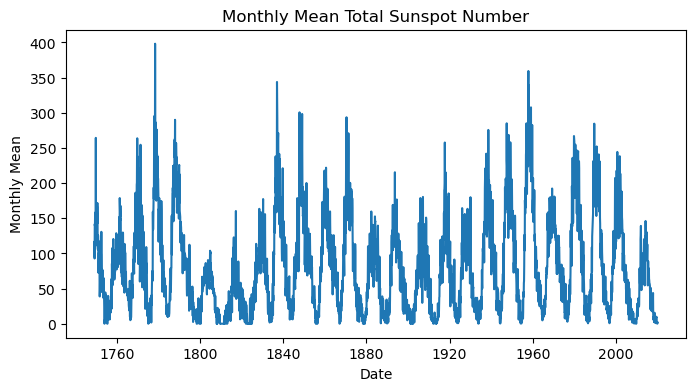

In [4]:
plt.figure(figsize=(8,4))
plt.plot(df)
plt.title('Monthly Mean Total Sunspot Number')
plt.xlabel('Date')
plt.ylabel('Monthly Mean')
plt.show()

## Time Series division

In [5]:
train, val, test = df.loc['1749':'1934'], df.loc['1935':'1991'], df.loc['1992':]

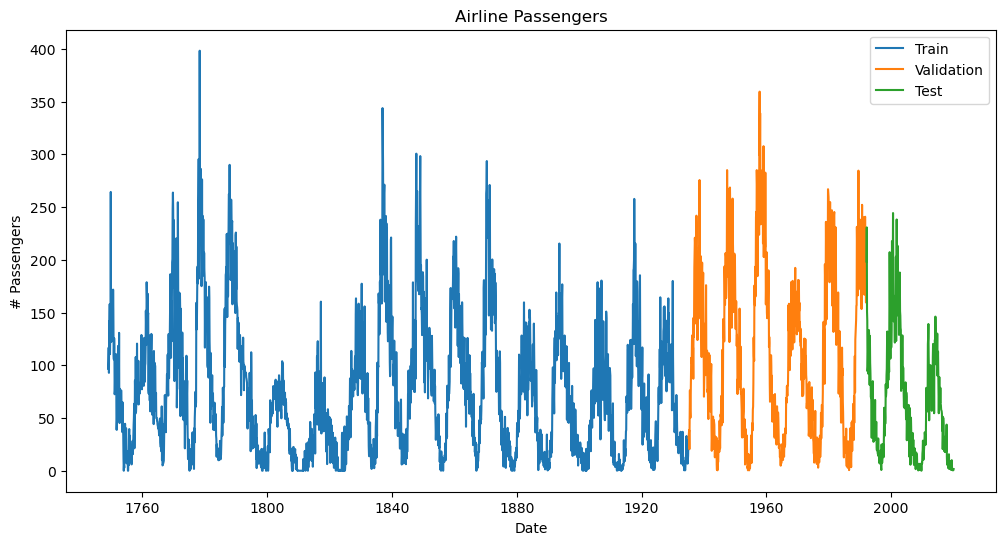

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values, label='Train')
plt.plot(val.index, val.values, label='Validation')
plt.plot(test.index, test.values, label='Test')
plt.title('Airline Passengers')
plt.xlabel('Date')
plt.ylabel('# Passengers')
plt.legend()
plt.show()

## Testing stationarity

In [7]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

In [8]:
import statsmodels.api as sm

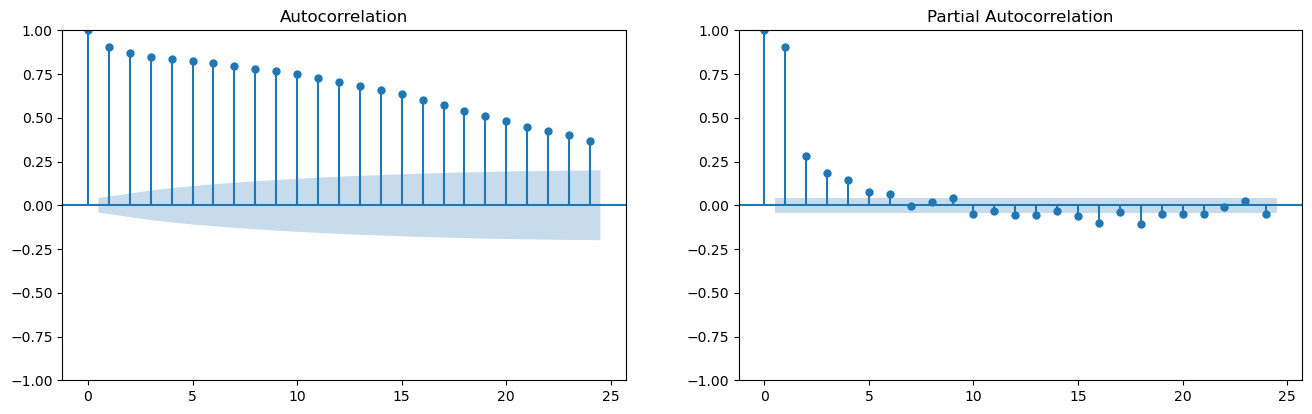

In [9]:
acf_pacf(train, 24)

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
def stationary_test(series):
  p_value = adfuller(series)[1]
  print(p_value)
  if p_value < 0.05:
    print("Stationary series")
  else:
    print("Non-stationary series")

In [13]:
stationary_test(train)

5.132229837958829e-12
Stationary series


## Grid Search

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools

In [15]:
p = range(0, 3) # Autoregression
d = [0]         # Differentiation
q = range(0, 3) # Moving average
s = [0, 12]     # Seasonality

In [16]:
all_params = list(itertools.product(p, d, q, s))

In [17]:
best_score = float("inf")
best_params = None
for params in all_params:
    try:
        model = SARIMAX(train, order=params[:3], seasonal_order=params)
        result = model.fit()
        pred = result.get_forecast(steps=len(val))
        mse = mean_squared_error(val, pred.predicted_mean)
        if mse < best_score:
            best_score = mse
            best_params = params
    except:
        continue

/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10


/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/

In [18]:
train_complete = result = pd.concat([train, val])

In [19]:
model = SARIMAX(train_complete, order=best_params[:3], seasonal_order=best_params)
result = model.fit()
pred = result.forecast(steps=len(test))

/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


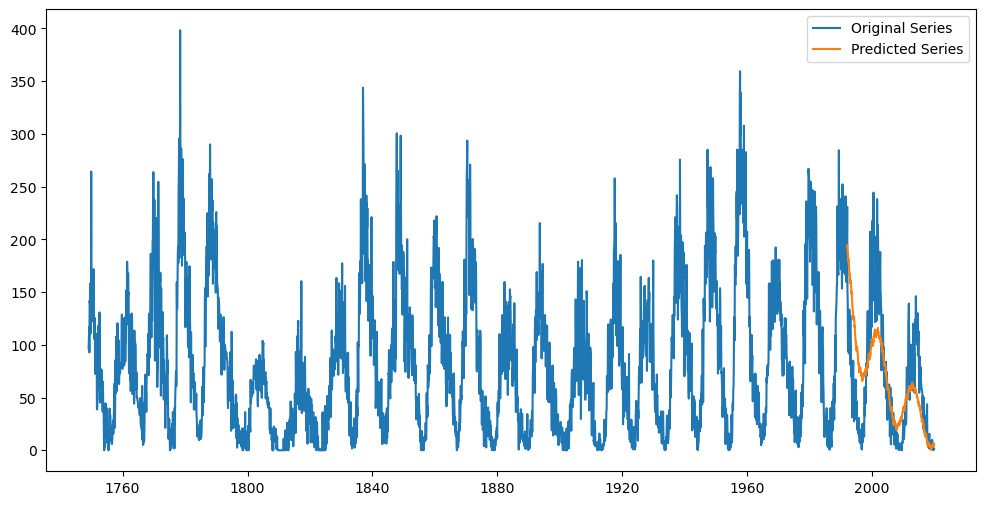

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df, label='Original Series')
plt.plot(pred, label='Predicted Series')
plt.legend()
plt.show()

In [21]:
best_score

17220.178082717834

In [22]:
best_params

(2, 0, 2, 12)